In [5]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [8]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [9]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

jamestown sh
tarauaca br
rikitea pf
kapaa us
carnarvon au
kadykchan ru
hermanus za
ushuaia ar
ulladulla au
tongchuan cn
waingapu id
port elizabeth za
kyra ru
butaritari ki
bredasdorp za
hofn is
bathsheba bb
borovoy ru
briancon fr
upernavik gl
vardo no
arman ru
batagay-alyta ru
ushuaia ar
mamallapuram in
korla cn
manokwari id
ballina au
amderma ru
bubaque gw
port blair in
port alfred za
cape town za
barrow us
hithadhoo mv
mariental na
hobart au
galesong id
port keats au
noumea nc
touros br
vaini to
albany au
bambous virieux mu
lubango ao
yellowknife ca
ribeira grande pt
thompson ca
manoel urbano br
tilichiki ru
nalut ly
mar del plata ar
funadhoo mv
kingaroy au
severo-kurilsk ru
puerto ayora ec
busselton au
atuona pf
santa luzia br
gorno-chuyskiy ru
safaga eg
grand river south east mu
ostrovnoy ru
bulgan mn
avarua ck
mataura pf
jadu ly
vaini to
mataura pf
kavieng pg
bluff nz
jamestown sh
bluff nz
lompoc us
taolanaro mg
hermanus za
turukhansk ru
dolbeau ca
thunder bay ca
hanzhong cn
rikit

carnarvon au
amderma ru
saldanha za
jaguariaiva br
ye mm
taolanaro mg
morondava mg
pevek ru
mataura pf
jiddah sa
albany au
albany au
hermanus za
cabo san lucas mx
bambous virieux mu
kapaa us
hami cn
hithadhoo mv
albany au
mataura pf
mataura pf
karratha au
olga ru
airai pw
tabou ci
jamestown sh
hobart au
mezen ru
samandag tr
georgetown sh
ribeira grande pt
codrington ag
busselton au
bull savanna jm
barentsburg sj
kupang id
kodiak us
port lincoln au
santa clara mx
leningradskiy ru
vilhena br
east london za
avarua ck
hithadhoo mv
ponta delgada pt
avarua ck
nanortalik gl
rikitea pf
batagay-alyta ru
kapaa us
ancud cl
rikitea pf
surt ly
rodino ru
punta arenas cl
port alfred za
mogadishu so
saquarema br
ushuaia ar
albany au
sentyabrskiy ru
victoria sc
puerto ayora ec
tigil ru
shenjiamen cn
labuhan id
vila franca do campo pt
bluff nz
hermanus za
faanui pf
puerto ayora ec
vidim ru
biltine td
grand river south east mu
cabo san lucas mx
pevek ru
saint-gaudens fr
hobart au
new norfolk au
moron mn


butaritari ki
kapit my
port alfred za
saint-philippe re
daxian cn
mataura pf
komsomolskiy ru
natal br
ingham au
new norfolk au
hobart au
bluff nz
puerto ayora ec
broome au
vardo no
punta arenas cl
syamzha ru
khatanga ru
meulaboh id
jamestown sh
xinqing cn
longyearbyen sj
mataura pf
chaohu cn
nordhorn de
butaritari ki
pincher creek ca
kodiak us
bethel us
portree gb
thompson ca
seoul kr
hobart au
atuona pf
rikitea pf
aquiraz br
rikitea pf
khandbari np
phun phin th
kirensk ru
naze jp
brae gb
chokurdakh ru
scottsburgh za
nizhneyansk ru
vrangel ru
grand river south east mu
tokur ru
maraba br
huarmey pe
axixa do tocantins br
saldanha za
souillac mu
maniitsoq gl
puerto ayora ec
manggar id
butaritari ki
camopi gf
jamestown sh
belushya guba ru
tocopilla cl
san cristobal ec
vaini to
saint-pierre pm
bambous virieux mu
jamestown sh
rikitea pf
coahuayana mx
ogembo ke
male mv
ushuaia ar
cape town za
mataura pf
malakal sd
barrow us
ancud cl
knysna za
rikitea pf
jamestown sh
tasiilaq gl
rikitea pf
bet

In [10]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

590

In [11]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [12]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a4235f337aa1728cb0ef9c899035972


In [13]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [15]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | tarauaca
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | kapaa
Processing Record 5 of Set 1 | carnarvon
Processing Record 6 of Set 1 | kadykchan
City not found. Skipping...
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | ulladulla
Processing Record 10 of Set 1 | tongchuan
Processing Record 11 of Set 1 | waingapu
Processing Record 12 of Set 1 | port elizabeth
Processing Record 13 of Set 1 | kyra
Processing Record 14 of Set 1 | butaritari
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | hofn
Processing Record 17 of Set 1 | bathsheba
Processing Record 18 of Set 1 | borovoy
Processing Record 19 of Set 1 | briancon
Processing Record 20 of Set 1 | upernavik
Processing Record 21 of Set 1 | vardo
Processing Record 22 of Set 1 | arman
Processing Record 23 o

Processing Record 38 of Set 4 | karaton
Processing Record 39 of Set 4 | nanortalik
Processing Record 40 of Set 4 | barcelos
Processing Record 41 of Set 4 | toliary
City not found. Skipping...
Processing Record 42 of Set 4 | saint george
Processing Record 43 of Set 4 | qaanaaq
Processing Record 44 of Set 4 | inuvik
Processing Record 45 of Set 4 | praia da vitoria
Processing Record 46 of Set 4 | lorengau
Processing Record 47 of Set 4 | california
Processing Record 48 of Set 4 | magdalena
Processing Record 49 of Set 4 | balabac
Processing Record 50 of Set 4 | nome
Processing Record 1 of Set 5 | hadejia
Processing Record 2 of Set 5 | coquimbo
Processing Record 3 of Set 5 | fortuna
Processing Record 4 of Set 5 | gao
Processing Record 5 of Set 5 | klaksvik
Processing Record 6 of Set 5 | khatanga
Processing Record 7 of Set 5 | atkinson
Processing Record 8 of Set 5 | husavik
Processing Record 9 of Set 5 | whakatane
Processing Record 10 of Set 5 | amilly
Processing Record 11 of Set 5 | port-gen

Processing Record 26 of Set 8 | yaring
Processing Record 27 of Set 8 | luderitz
Processing Record 28 of Set 8 | mae sai
Processing Record 29 of Set 8 | komsomolets
Processing Record 30 of Set 8 | graulhet
Processing Record 31 of Set 8 | eureka
Processing Record 32 of Set 8 | dong hoi
Processing Record 33 of Set 8 | sobolevo
Processing Record 34 of Set 8 | campbellsville
Processing Record 35 of Set 8 | mandera
Processing Record 36 of Set 8 | pacific grove
Processing Record 37 of Set 8 | axim
Processing Record 38 of Set 8 | pontianak
Processing Record 39 of Set 8 | tateyama
Processing Record 40 of Set 8 | bambanglipuro
Processing Record 41 of Set 8 | palmer
Processing Record 42 of Set 8 | kaspiysk
Processing Record 43 of Set 8 | beloeil
Processing Record 44 of Set 8 | barkly west
Processing Record 45 of Set 8 | marshfield
Processing Record 46 of Set 8 | plettenberg bay
Processing Record 47 of Set 8 | altagracia de orituco
Processing Record 48 of Set 8 | minot
Processing Record 49 of Set 

Processing Record 15 of Set 12 | khandbari
Processing Record 16 of Set 12 | phun phin
City not found. Skipping...
Processing Record 17 of Set 12 | kirensk
Processing Record 18 of Set 12 | brae
Processing Record 19 of Set 12 | scottsburgh
City not found. Skipping...
Processing Record 20 of Set 12 | vrangel
Processing Record 21 of Set 12 | tokur
Processing Record 22 of Set 12 | maraba
Processing Record 23 of Set 12 | huarmey
Processing Record 24 of Set 12 | axixa do tocantins
City not found. Skipping...
Processing Record 25 of Set 12 | manggar
Processing Record 26 of Set 12 | camopi
Processing Record 27 of Set 12 | tocopilla
Processing Record 28 of Set 12 | saint-pierre
Processing Record 29 of Set 12 | coahuayana
Processing Record 30 of Set 12 | ogembo
Processing Record 31 of Set 12 | male
Processing Record 32 of Set 12 | malakal
Processing Record 33 of Set 12 | knysna
Processing Record 34 of Set 12 | diamantino
Processing Record 35 of Set 12 | cherskiy
Processing Record 36 of Set 12 | v

In [16]:
len(city_data)

539

In [17]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jamestown,42.10,-79.24,60.01,66,1,11.41,US,2020-10-07 00:41:30
1,Tarauaca,-8.16,-70.77,80.47,56,26,1.79,BR,2020-10-07 00:45:53
2,Rikitea,-23.12,-134.97,74.03,82,100,7.90,PF,2020-10-07 00:45:53
3,Kapaa,22.08,-159.32,87.01,66,40,5.82,US,2020-10-07 00:45:54
4,Carnarvon,-24.87,113.63,64.40,39,0,8.05,AU,2020-10-07 00:45:54
5,Hermanus,-34.42,19.23,57.99,91,0,3.00,ZA,2020-10-07 00:45:54
6,Ushuaia,-54.80,-68.30,37.40,74,20,28.86,AR,2020-10-07 00:45:55
7,Ulladulla,-35.35,150.47,63.00,100,75,3.36,AU,2020-10-07 00:45:55
8,Tongchuan,35.08,109.09,54.30,63,0,4.52,CN,2020-10-07 00:45:55
9,Waingapu,-9.66,120.26,82.99,53,0,6.08,ID,2020-10-07 00:45:55


In [22]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jamestown,US,2020-10-07 00:41:30,42.10,-79.24,60.01,66,1,11.41
1,Tarauaca,BR,2020-10-07 00:45:53,-8.16,-70.77,80.47,56,26,1.79
2,Rikitea,PF,2020-10-07 00:45:53,-23.12,-134.97,74.03,82,100,7.90
3,Kapaa,US,2020-10-07 00:45:54,22.08,-159.32,87.01,66,40,5.82
4,Carnarvon,AU,2020-10-07 00:45:54,-24.87,113.63,64.40,39,0,8.05


In [24]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [25]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [27]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'10/06/20'

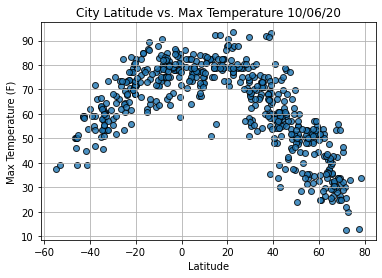

In [28]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

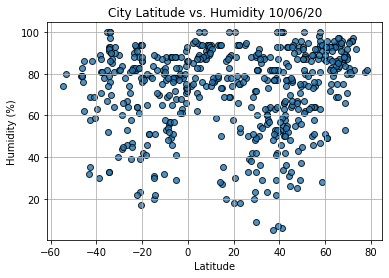

In [29]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

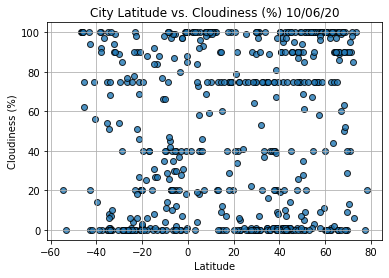

In [30]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

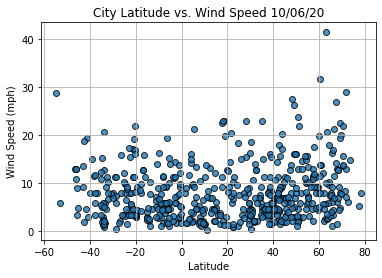

In [31]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [36]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [37]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jamestown,US,2020-10-07 00:41:30,42.10,-79.24,60.01,66,1,11.41
3,Kapaa,US,2020-10-07 00:45:54,22.08,-159.32,87.01,66,40,5.82
8,Tongchuan,CN,2020-10-07 00:45:55,35.08,109.09,54.30,63,0,4.52
11,Kyra,RU,2020-10-07 00:45:56,49.58,111.98,37.15,74,0,2.91
12,Butaritari,KI,2020-10-07 00:45:56,3.07,172.79,82.65,78,0,11.70
...,...,...,...,...,...,...,...,...,...
531,Malakal,SS,2020-10-07 00:47:59,9.53,31.66,70.90,90,100,1.74
534,Cherskiy,RU,2020-10-07 00:47:59,68.75,161.30,33.28,84,0,4.41
535,Veshenskaya,RU,2020-10-07 00:47:59,49.63,41.73,46.60,56,7,6.96
536,Aksehir,TR,2020-10-07 00:47:59,38.36,31.42,65.84,41,39,1.45


In [42]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [43]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

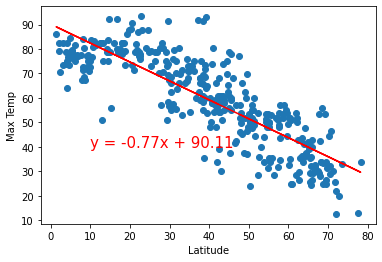

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

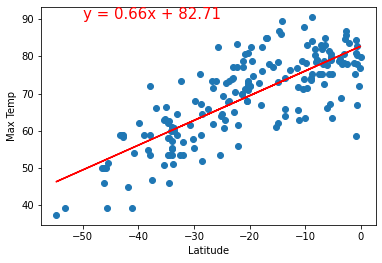

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

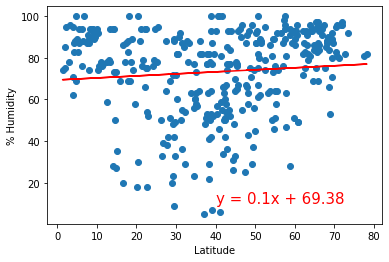

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

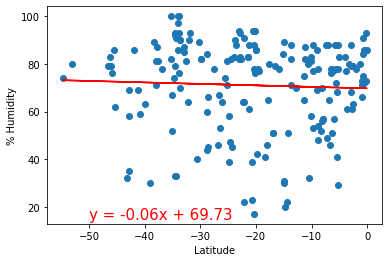

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

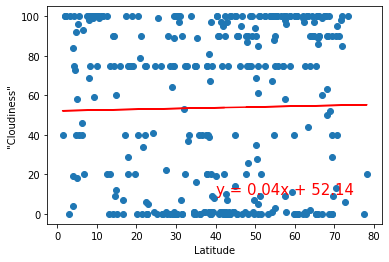

In [54]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '"Cloudiness"',(40,10))

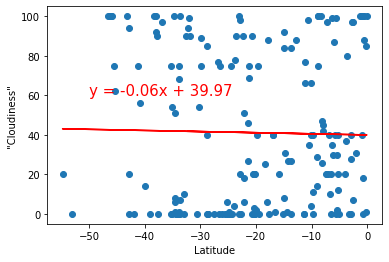

In [56]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '"Cloudiness"',(-50,60))

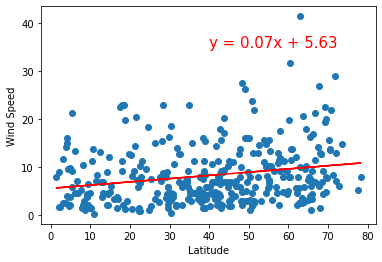

In [58]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

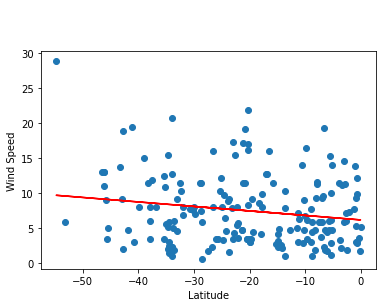

In [60]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))